**Analyse des sentiments des critiques de films** **IMDB**

*Énoncé du problème :*

En cela, nous devons prédire le nombre d'avis positifs et négatifs basés sur les sentiments en utilisant différents modèles de classification

***Importer les bibliothèques nécessaires***

In [98]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

**importer l'ensemble de données**

In [99]:
imdb_data=pd.read_csv('IMDB Dataset.csv',sep=',',engine='python', encoding='utf-8', error_bad_lines =False)
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


**Exploratery data analysis**

In [100]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**sentiment count**

In [101]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**split data**

In [102]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


**Text normalization**

In [103]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/norene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Removing html strips and noise text
**

In [104]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

**Removing special characters
**

In [105]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

**text stemming**

In [106]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

**delete 'stopwords'**

In [107]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'theirs', 'our', 'being', 'by', 'do', 'my', "you've", 'own', 'nor', 'then', 'y', 'not', 'against', 'mightn', 'than', 'your', 'who', 'only', "you'll", 'off', 'have', "doesn't", 'during', 'should', "you're", 'about', 'from', 'the', 'ourselves', 'be', 'any', 'so', 'weren', 'at', 'all', 'shan', 'those', 'll', 'doesn', 'couldn', 'himself', 'below', 'her', 'until', 'which', "hadn't", 'same', 'if', "shan't", 'it', 'when', "needn't", "she's", "mustn't", 'and', "hasn't", "shouldn't", 'wouldn', 'doing', 'hasn', "wasn't", 'he', 'more', 'very', "aren't", "didn't", "weren't", "haven't", "couldn't", 'some', 'that', 'too', 'wasn', 'over', 'herself', 'you', 'these', 'in', 'where', 'o', "that'll", 'his', 'under', 'itself', 'isn', 'd', 'above', 'won', 'how', 'there', 'are', 'is', 'as', 'ma', 'was', 'don', 'did', 'yourselves', 'him', 'mustn', 'hers', 'am', 'can', 'does', 'up', 'yours', 'will', 'i', 'an', 'between', 'been', 'just', 'we', 'what', 'but', 'on', 'both', "don't", 'for', 'no', 'yourself', 'the

**Normalized train reviews**

In [108]:
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

**Normalized test reviews**

In [109]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[40005]

'hickori dickori dock wa good poirot mysteri confess read book despit avid agatha christi fan adapt isnt without problem time humour valiant attempt get right wa littl overdon event lead final solut rather rush also thought slow moment mysteri felt pad howev love hickori dickori dock wa film veri similar visual style brilliant abc murder realli set atmospher dark camera work dark light darker moment somewhat creepi thi wa help one haunt music score poirot adapt mayb disturb one one two buckl shoe gave nightmar plot complex essenti ingredi though convolut buckl shoeand way good thing act wa veri good david suchet impeccablei know cant use thi word forev cant think better word describ hi perform seri poirot phillip jackson paulin moran justic integr charact brilliantli student great person well develop whole particularli damian lewi leonard solid mysteri doesnt rank along best 7510 bethani cox'

**Bags of words model**



In [110]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)


**Term Frequency-Inverse Document Frequency model (TFIDF)**

In [111]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6209089)
Tfidf_test: (10000, 6209089)


**labeling the sentiment text**

In [115]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


**Split the sentiment tdata**

In [120]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Naive Bayes**

In [121]:
#training the model
mnb=MultinomialNB()
#fitting for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


**Model performance on test data**

In [122]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 1]
[0 0 0 ... 0 1 1]


In [123]:
print('Naive bayes')
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

Naive bayes
mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509


KNN

In [131]:
#training the model
neighbag= KNeighborsClassifier(n_neighbors=3)
#fit the KNN for the bag of the words
neighbag.fit(cv_train_reviews,train_sentiments)
#training the model
neight = KNeighborsClassifier(n_neighbors=5)
#fit the KNN for tfdif
neight.fit(tv_train_reviews,train_sentiments)


KNeighborsClassifier()

In [132]:
#Predicting the model for bag of words 
predictedbag=neighbag.predict(cv_test_reviews)
print(predictedbag)
#Predicting the model for tfidf feature
predictedt=neight.predict(tv_test_reviews) 
print(predictedt)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


**Accuracy of each model**

In [133]:
print('Naive bayes')
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)
print('KNN')
#Accuracy score for bag of words
bag_KNN_score=accuracy_score(test_sentiments,predictedbag)
print("bag_KNN_score:",bag_KNN_score)
#Accuracy score for tfidf features
tfidf_KNN_score=accuracy_score(test_sentiments,predictedt)
print("tfidf_KNN_score :",tfidf_KNN_score)

Naive bayes
mnb_bow_score : 0.751
mnb_tfidf_score : 0.7509
KNN
bag_KNN_score: 0.4993
tfidf_KNN_score : 0.4955


**plot the classification report of bag of words in Naive bayes**

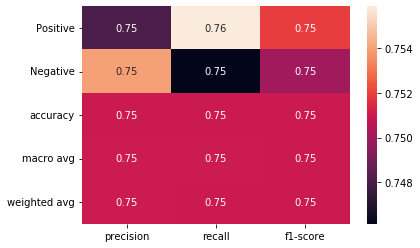

In [134]:
clf_report_bow = classification_report(test_sentiments,mnb_bow_predict,
                                   
                                   target_names=['Positive','Negative'],
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report_bow).iloc[:-1, :].T, annot=True)

**plot the classification report of tf-idf Naive bayes**

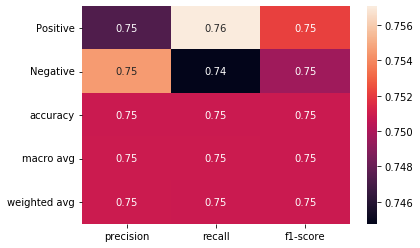

In [135]:
clf_report_tfidf = classification_report(test_sentiments,mnb_tfidf_predict,
                                   
                                   target_names=['Positive','Negative'],
                                   output_dict=True)



sns.heatmap(pd.DataFrame(clf_report_tfidf).iloc[:-1, :].T, annot=True)


**plot classifiction report of bow in KNN**

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      4993
    Negative       0.00      0.00      0.00      5007

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



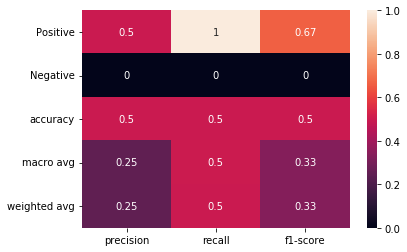

In [136]:
clf_report_bow_k= classification_report(test_sentiments,predictedbag,
                                 
                                   target_names=['Positive','Negative'],
                                   output_dict=True)


cl=classification_report(test_sentiments,predictedbag,target_names=['Positive','Negative'])
print(cl)
sns.heatmap(pd.DataFrame(clf_report_bow_k).iloc[:-1, :].T, annot=True)

**plot classifiction report of tf-idf in KNN**

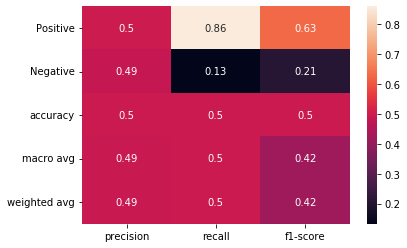

In [137]:
clf_report_tf_k= classification_report(test_sentiments,predictedt,
                                 
                                   target_names=['Positive','Negative'],
                                   output_dict=True)



sns.heatmap(pd.DataFrame(clf_report_tf_k).iloc[:-1, :].T, annot=True)